In [ ]:
!pip install ogb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=7cd28e571aa35453957769bf161a9ad8715c59435b04c45574e72204e11917c9
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# Dataset Overview: ogbn-proteins
Hu, Weihua, et al. "Open Graph Benchmark: Datasets for Machine Learning on Graphs." arXiv preprint arXiv:2005.00687 (2020).

The ogbn-proteins dataset is an undirected, weighted, and typed (according to species) graph.
- Nodes represent proteins, and edges indicate different types of biologically meaningful associations between proteins, e.g., physical interactions, co-expression or homology (Szklarczyk et al., 2019; Consortium, 2018). All edges come with 8-dimensional features, where each dimension represents the approximate confidence of a single association type and takes on values between 0 and 1 (the larger the value is, the more confident we are about the association). The proteins come from 8 species.
- Prediction task. The task is to predict the presence of protein functions in a multi-label binary classification setup, where there are 112 kinds of labels to predict in total. The performance is measured by the average of ROC-AUC scores across the 112 tasks.
- Dataset splitting. OGB splits the protein nodes into training/validation/test sets according to the species which the proteins come from.




# Load dataset

In [ ]:
import tqdm
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from ogb.nodeproppred import NodePropPredDataset
dataset = NodePropPredDataset(name = 'ogbn-proteins')

Downloaded 0.21 GB: 100%|██████████| 216/216 [00:08<00:00, 24.68it/s]


Extracting dataset/proteins.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Saving...


In [ ]:
split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph, label = dataset[0]

In [ ]:
graph.keys()

dict_keys(['edge_index', 'edge_feat', 'node_feat', 'node_species', 'num_nodes'])

0. There are 132534 nodes

In [ ]:
graph['num_nodes']

132534

1. There are not features for nodes

In [ ]:
graph['node_feat']

2. Dataset is split by species: 6 species in Train, 1 in Validation and 1 in Test

In [ ]:
Counter(graph['node_species'].T[0].tolist())

Counter({3702: 25449,
         4932: 6568,
         6239: 18108,
         7227: 13015,
         9606: 19354,
         511145: 4125,
         10090: 21236,
         7955: 24679})

In [ ]:
np.unique(graph['node_species'][train_idx])

array([  3702,   4932,   6239,   7227,   9606, 511145])

In [ ]:
np.unique(graph['node_species'][valid_idx])

array([10090])

In [ ]:
np.unique(graph['node_species'][test_idx])

array([7955])

3. There are 112 labels, and they (funny) are ordered by the number of nodes that have this label.
It is an unbalanced dataset.
There are more 0-labeled nodes in the test than in validation and train.

In [ ]:
label.shape

(132534, 112)

In [ ]:
label.sum(0)

array([69859, 59185, 48287, 40512, 38766, 36022, 35651, 33583, 31405,
       25716, 25671, 25520, 22519, 21704, 21053, 20867, 20345, 19656,
       19665, 19472, 19243, 19416, 19326, 18934, 18692, 18631, 18575,
       18520, 18542, 18409, 17603, 17164, 16016, 15469, 15229, 15246,
       15239, 14939, 14964, 14692, 14524, 14479, 14213, 14355, 13899,
       13794, 13752, 13752, 13708, 13614, 13510, 13452, 13228, 12673,
       12587, 12514, 12348, 12262, 12243, 12098, 12006, 11852, 11628,
       11551, 11481, 11464, 11096, 11096, 10945, 10838, 10841, 10567,
       10509, 10201,  9927,  9620,  9586,  9335,  9205,  9135,  9012,
        9003,  8899,  8777,  8729,  8751,  8717,  8668,  8537,  8537,
        8462,  8404,  8160,  8040,  7933,  7635,  7591,  7586,  7559,
        7528,  7302,  6774,  6659,  6495,  6032,  5330,  5236,  5210,
        4215,  3549,  3335,  2713])

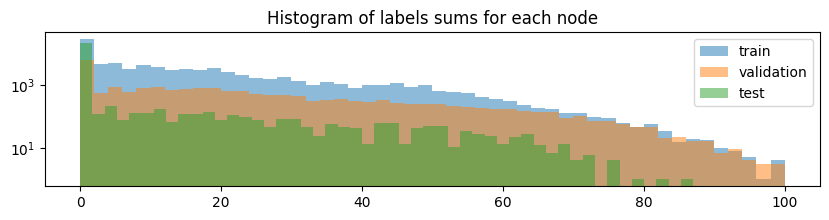

In [ ]:
plt.figure(figsize=(10, 2))
plt.hist(label[train_idx].sum(axis=1), bins=50, log=True, alpha=0.5)
plt.hist(label[valid_idx].sum(axis=1), bins=50, log=True, alpha=0.5)
plt.hist(label[test_idx].sum(axis=1), bins=50, log=True, alpha=0.5)
plt.legend(['train', 'validation', 'test'])
plt.title('Histogram of labels sums for each node')
plt.show()

In [ ]:
counts = Counter(label[train_idx].sum(axis=1))
print(counts.most_common(10))
del counts

[(0, 25220), (1, 3363), (4, 3020), (8, 2422), (3, 2419), (2, 2097), (5, 2018), (10, 1945), (18, 1903), (9, 1789)]


4. There are 79122504 edges.

In [ ]:
graph['edge_index'].shape

(2, 79122504)

In [ ]:
graph['edge_index'].T

array([[    1, 96401],
       [96401,     1],
       [    1, 68343],
       ...,
       [86562, 86404],
       [86562, 86435],
       [86435, 86562]])

In [ ]:
graph['edge_feat'][0:2]

array([[0.501, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.501, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]],
      dtype=float32)

I checked in advance, and there is only one connected component in this graph. Which means proteins from different species are connected.

This is the goal of this notebook analysis to understand why and how.

# Check edges features

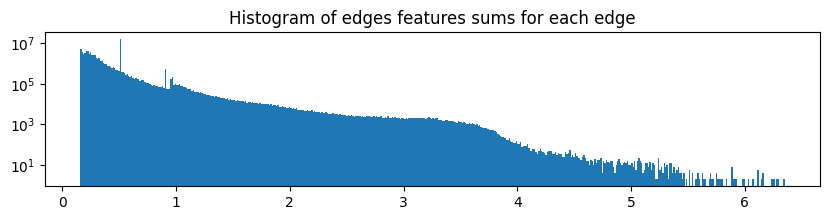

In [ ]:
plt.figure(figsize=(10, 2))
plt.hist(graph['edge_feat'].sum(axis=1), bins=500, log=True)
plt.title('Histogram of edges features sums for each edge')
plt.show()

In [ ]:
print('Min sum of edge features', graph['edge_feat'].sum(axis=1).min())
print('Max sum of edge features', graph['edge_feat'].sum(axis=1).max())

Min sum of edge features 0.15799999
Max sum of edge features 6.35


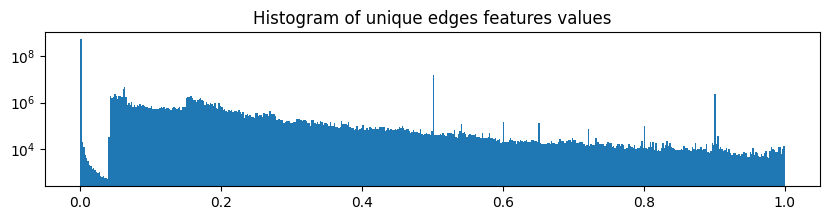

In [ ]:
plt.figure(figsize=(10, 2))
plt.hist(graph['edge_feat'].flatten(), bins=500, log=True)
plt.title('Histogram of unique edges features values')
plt.show()

In [ ]:
print('Min of edge features', graph['edge_feat'].min())
print('Max of edge features', graph['edge_feat'].max())

Min of edge features 0.001
Max of edge features 1.0


Most common edge features vectors:

- the most popular is (0.501, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001). It looks like an anomaly, with 15352844 for it vs 489322 times for the second common connection


In [ ]:
counts = Counter([tuple(ef) for ef in graph['edge_feat']])
print(counts.most_common(10))
del counts

[((0.501, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001), 15352844), ((0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.901, 0.001), 489322), ((0.001, 0.001, 0.001, 0.001, 0.18, 0.001, 0.001, 0.001), 314208), ((0.001, 0.001, 0.001, 0.001, 0.17, 0.001, 0.001, 0.001), 292560), ((0.001, 0.001, 0.001, 0.001, 0.001, 0.172, 0.001, 0.001), 265156), ((0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.168), 260698), ((0.001, 0.001, 0.001, 0.001, 0.001, 0.17, 0.001, 0.001), 253876), ((0.001, 0.001, 0.001, 0.001, 0.001, 0.157, 0.001, 0.001), 235956), ((0.001, 0.001, 0.001, 0.001, 0.154, 0.001, 0.001, 0.001), 233956), ((0.001, 0.001, 0.001, 0.001, 0.152, 0.001, 0.001, 0.001), 207560)]


Most common edge features single values

In [ ]:
counts = Counter(graph['edge_feat'].flatten())
print(counts.most_common(10))
del counts

[(0.001, 502299446), (0.501, 15370878), (0.063, 3324506), (0.062, 2606564), (0.901, 2357812), (0.049, 1424012), (0.064, 1134344), (0.061, 1098934), (0.051, 1080012), (0.043, 1064876)]


Most common edge features values in dimension 0 of edge features

In [ ]:
counts = Counter(graph['edge_feat'].T[0])
print(counts.most_common(10))
del counts

[(0.001, 63769660), (0.501, 15352844)]


There is no 0 value in edge features values

In [ ]:
np.where(graph['edge_feat'].flatten()==0)

(array([], dtype=int64),)

# Check how different species are connected



In [ ]:
def get_adj_dict(edge_index, num_nodes):
  """
  Build adjacency dictionary
  """
  adj_dict = {k: {} for k in range(num_nodes)}
  for i, (u, v) in tqdm.tqdm(enumerate(edge_index)):
    adj_dict[u][v] = i
    adj_dict[v][u] = i

  return adj_dict

In [ ]:
adj_dict = get_adj_dict(graph['edge_index'].T, graph['num_nodes'])

79122504it [03:09, 418523.89it/s]


In [ ]:
# find first node that is connected to node from other species
for u, ll in adj_dict.items():
  u_s = graph['node_species'][u, 0]
  vs_s = [v for v in ll if graph['node_species'][v, 0]!=u_s]
  if len(vs_s)> 0:
    break

In [ ]:
np.unique(graph['edge_feat'][[ll[v] for v in ll if graph['node_species'][v, 0]!=u_s]], axis=0)

array([[0.501, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]],
      dtype=float32)

In [ ]:
anomaly_features = np.unique(graph['edge_feat'][[ll[v] for v in ll if graph['node_species'][v, 0]!=u_s]], axis=0)[0]

Collect information about unique edge features inside and outside species for each node

In [ ]:
nodes_info = [[False, 0, False, 0]]*graph['num_nodes']
for u, ll in tqdm.tqdm(adj_dict.items()):
  u_s = graph['node_species'][u, 0]
  vs_in = np.unique(graph['edge_feat'][[ll[v] for v in ll if graph['node_species'][v, 0]==u_s]], axis=0)
  vs_out = np.unique(graph['edge_feat'][[ll[v] for v in ll if graph['node_species'][v, 0]!=u_s]], axis=0)
  nodes_info[u] = [np.any(np.all(np.isin(vs_in, anomaly_features, True),axis=1)),
                   len(vs_in),
                   np.any(np.all(np.isin(vs_out, anomaly_features, True),axis=1)),
                   len(vs_out)]

100%|██████████| 132534/132534 [05:08<00:00, 429.86it/s] 


In [ ]:
nodes_info[:15]

[[False, 120, False, 0],
 [False, 230, True, 1],
 [False, 6, False, 0],
 [False, 99, False, 0],
 [False, 300, True, 1],
 [True, 225, False, 0],
 [False, 315, True, 1],
 [False, 246, True, 1],
 [False, 176, False, 0],
 [False, 599, True, 1],
 [False, 61, True, 1],
 [False, 130, True, 1],
 [False, 68, False, 0],
 [False, 128, False, 0],
 [False, 47, False, 0]]

In [ ]:
in_has_magic, _ , _ , _ = list(zip(*nodes_info))
print('Percent of nodes that has anomaly-edge inside of its species for all nodes:', sum(in_has_magic) / graph['num_nodes'] * 100)
print('Number of nodes that has anomaly-edge inside of its species', sum(in_has_magic))

Percent of nodes that has anomaly-edge for all nodes: 1.785956811082439
Number of nodes that has anomaly-edge 2367


In [ ]:
out_species_nodes_with_anomaly = [out_match for _, _, out_match, len_out_uniques in nodes_info if len_out_uniques > 0]
print('Percent of nodes that has anomaly-edge outside of its species for all nodes with outside edges:', sum(out_species_nodes_with_anomaly)/len(out_species_nodes_with_anomaly) * 100)
print('Number of nodes that has anomaly-edge outside of its species ', len(out_species_nodes_with_anomaly))

Percent of nodes that has anomaly-edge outside of its species for all nodes with outside edges: 100.0
Number of nodes that has anomaly-edge outside of its species  105051


**Conclusion**: that anomaly edge features are connected that happens inside and outside of species. And this is the only connection that connects different species

In [ ]:
del adj_dict

# Split graph on two subgraphs:
1. connections outside of species
2. all other connections


Additionally, Replace 0.001 edge features value with 0 and remove 0-features-value connections


In [ ]:
edge_feat_0 = graph['edge_feat'].T[0]
edge_feat = graph['edge_feat'].T[1:]
edge_feat_0.shape, edge_feat.shape

((79122504,), (7, 79122504))

In [ ]:
value = edge_feat_0[-1]
edge_feat_0=np.where(edge_feat_0==value , 0,edge_feat_0)
edge_feat=np.where(edge_feat==value, 0,edge_feat)

In [ ]:
edge_feat_is_zero = np.where(edge_feat.sum(axis=0)==0, False, True)
edge_feat_0_is_zero = np.where(edge_feat_0==0, False, True)

In [ ]:
new_edge_feat = edge_feat[:, edge_feat_is_zero]
new_edge_index = graph['edge_index'].T[edge_feat_is_zero].T

new_edge_feat_0 = edge_feat_0[edge_feat_0_is_zero]
new_edge_index_0 = graph['edge_index'].T[edge_feat_0_is_zero].T

In [ ]:
new_edge_feat.shape, new_edge_index.shape, new_edge_feat_0.shape, new_edge_index_0.shape

((7, 63769660), (2, 63769660), (15352844,), (2, 15352844))

## check  number of connected components in each subgraph:

In [ ]:
import networkx as nx

Subgraph with inside-species connections:

In [ ]:
G = nx.Graph()
G.add_nodes_from(range(0, graph['num_nodes']))
G.add_edges_from(new_edge_index.T)
cc = nx.connected_components(G)
cc = list(cc)

In [ ]:
len(cc)

8

In [ ]:
[len(c) for c in cc]

[25449, 6568, 18108, 13015, 19354, 4125, 21236, 24679]

Subgraph with outside-species connections:

In [ ]:
G0 = nx.Graph()
G0.add_nodes_from(range(0, graph['num_nodes']))
G0.add_edges_from(new_edge_index_0.T)
cc0 = nx.connected_components(G0)
cc0 = list(cc0)

In [ ]:
len(cc0)

34582

In [ ]:
len([len(c) for c in cc0 if len(c)>1])

7099

In [ ]:
[len(c) for c in cc0 if len(c)>1][:10]

[48, 7, 38, 194, 24748, 9, 303, 64, 12, 578]

Indeed, if you remove "anomaly-features-edges" that connect nodes from different species, the graph has 8 connected components with the number of nodes in each corresponding to the number of different species in the graph.
Outside connections connected different nodes from different species, and no clear pattern is visible yet.

Interesting fact is that the edge-feature value used for outside-species connections is 0.501. I assume that it is safe to replace "default zero" edge-feature value of 0.001 for outside connections with 0.

It is interesting to train models with different set ups of "default zero" edge-feature values: like it is provided by ogb and with true 0.


# Further analysis - to check other edge-features dimensions on connectivity and unique values:

In [ ]:
for i in range(1, graph['edge_feat'].shape[1]):
  counts = Counter(graph['edge_feat'].T[i])
  print(i, counts.most_common(10))
  print()
del counts

1 [(0.001, 74166916), (0.043, 547550), (0.191, 343132), (0.044, 249650), (0.045, 137896), (0.047, 109332), (0.059, 95110), (0.06, 85778), (0.046, 79512), (0.174, 69662)]

2 [(0.001, 78985788), (0.002, 27924), (0.003, 12582), (0.005, 7894), (0.004, 7576), (0.006, 4516), (0.008, 3040), (0.007, 2780), (0.009, 2420), (0.01, 1828)]

3 [(0.001, 77932218), (0.151, 19560), (0.152, 18746), (0.153, 18236), (0.154, 17596), (0.155, 17212), (0.156, 16684), (0.157, 16198), (0.158, 16110), (0.159, 15494)]

4 [(0.001, 41531862), (0.063, 3025312), (0.062, 2279052), (0.064, 855672), (0.061, 768956), (0.049, 756148), (0.065, 601474), (0.056, 550478), (0.054, 513072), (0.05, 487766)]

5 [(0.001, 52300246), (0.158, 601396), (0.157, 491216), (0.172, 478090), (0.17, 423436), (0.198, 418396), (0.049, 407084), (0.156, 399030), (0.174, 393252), (0.186, 392558)]

6 [(0.001, 76304526), (0.901, 2351112), (0.601, 116716), (0.651, 109128), (0.541, 73086), (0.801, 72296), (0.721, 62282), (0.361, 33358)]

7 [(0.001, 3